# UNSW-NB15 Cybersecurity Data

# ANN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.layers import Input, Dense

In [6]:
from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D, Embedding
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Reshape, Dropout, Dense,Multiply, Dot, Concatenate,Embedding
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

In [7]:
import math

from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten

In [8]:
df = pd.read_csv('D:\\IIT Kharagpur Notes\\Semester IV\\Datasets\\UNSW-NB15 - CSV Files\\UNSW-NB15 - CSV Files\\a part of training and testing set\\UNSW_NB15_training-set.csv')

In [9]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [10]:
df.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82331,82332,0.000009,udp,-,INT,2,0,104,0,111111.107200,...,1,1,0,0,0,1,1,0,Normal,0


In [11]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [13]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,82332.0,4.116650e+04,2.376735e+04,1.0,20583.750000,4.116650e+04,6.174925e+04,8.233200e+04
dur,82332.0,1.006756e+00,4.710444e+00,0.0,0.000008,1.413800e-02,7.193603e-01,5.999999e+01
spkts,82332.0,1.866647e+01,1.339164e+02,1.0,2.000000,6.000000e+00,1.200000e+01,1.064600e+04
dpkts,82332.0,1.754594e+01,1.155741e+02,0.0,0.000000,2.000000e+00,1.000000e+01,1.101800e+04
sbytes,82332.0,7.993908e+03,1.716423e+05,24.0,114.000000,5.340000e+02,1.280000e+03,1.435577e+07
dbytes,82332.0,1.323379e+04,1.514715e+05,0.0,0.000000,1.780000e+02,9.560000e+02,1.465753e+07
rate,82332.0,8.241089e+04,1.486204e+05,0.0,28.606114,2.650177e+03,1.111111e+05,1.000000e+06
sttl,82332.0,1.809677e+02,1.015134e+02,0.0,62.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,82332.0,9.571300e+01,1.166677e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.530000e+02
sload,82332.0,6.454902e+07,1.798618e+08,0.0,11202.466797,5.770032e+05,6.514286e+07,5.268000e+09


In [15]:
df.corr()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
id,1.000000,0.016037,-0.020766,-0.037020,-0.005647,-0.031115,-0.121700,0.095939,0.306539,-0.003063,...,-0.317444,-0.346396,-0.297913,-0.049584,-0.049279,0.035399,-0.345738,-0.275818,0.097736,-0.387489
dur,0.016037,1.000000,0.280239,0.217507,0.225432,0.172492,-0.118031,-0.000986,0.090048,-0.076343,...,-0.086880,-0.081637,-0.071127,0.015724,0.015547,0.018879,-0.080789,-0.091253,0.027472,-0.001145
spkts,-0.020766,0.280239,1.000000,0.369554,0.965750,0.198324,-0.068249,-0.092536,0.054601,-0.044194,...,-0.053109,-0.055095,-0.061852,0.010361,0.010423,0.000443,-0.049367,-0.058815,-0.013960,-0.027731
dpkts,-0.037020,0.217507,0.369554,1.000000,0.175834,0.976419,-0.083173,-0.163830,0.036483,-0.054145,...,-0.062549,-0.067452,-0.075012,0.012473,0.012555,0.021041,-0.057374,-0.063169,-0.016103,-0.061515
sbytes,-0.005647,0.225432,0.965750,0.175834,1.000000,0.010036,-0.025102,-0.017866,0.049891,-0.015228,...,-0.020586,-0.020451,-0.024065,-0.002572,-0.002569,-0.004626,-0.021540,-0.030049,-0.004910,0.020641
dbytes,-0.031115,0.172492,0.198324,0.976419,0.010036,1.000000,-0.047978,-0.114537,0.012537,-0.031266,...,-0.035335,-0.038965,-0.044048,-0.006521,-0.006498,0.022901,-0.033301,-0.034416,-0.009267,-0.032632
rate,-0.121700,-0.118031,-0.068249,-0.083173,-0.025102,-0.047978,1.000000,0.388155,-0.453913,0.550104,...,0.345573,0.366238,0.358902,-0.050093,-0.049952,-0.112432,0.327563,0.370816,-0.058689,0.328629
sttl,0.095939,-0.000986,-0.092536,-0.163830,-0.017866,-0.114537,0.388155,1.000000,-0.033338,0.252901,...,0.287568,0.315776,0.335118,-0.089618,-0.089897,-0.174840,0.236869,0.304131,-0.187933,0.504159
dttl,0.306539,0.090048,0.054601,0.036483,0.049891,0.012537,-0.453913,-0.033338,1.000000,-0.293939,...,-0.349865,-0.357793,-0.364181,0.052195,0.050854,0.208628,-0.403289,-0.454576,-0.087019,-0.098591
sload,-0.003063,-0.076343,-0.044194,-0.054145,-0.015228,-0.031266,0.550104,0.252901,-0.293939,1.000000,...,0.112361,0.083445,0.155386,-0.032551,-0.032464,-0.072814,0.110013,0.160250,-0.038030,0.124548


In [16]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
82327    False
82328    False
82329    False
82330    False
82331    False
Length: 82332, dtype: bool

In [17]:
df.drop_duplicates()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,82332.0,4.116650e+04,2.376735e+04,1.0,20583.750000,4.116650e+04,6.174925e+04,8.233200e+04
dur,82332.0,1.006756e+00,4.710444e+00,0.0,0.000008,1.413800e-02,7.193603e-01,5.999999e+01
spkts,82332.0,1.866647e+01,1.339164e+02,1.0,2.000000,6.000000e+00,1.200000e+01,1.064600e+04
dpkts,82332.0,1.754594e+01,1.155741e+02,0.0,0.000000,2.000000e+00,1.000000e+01,1.101800e+04
sbytes,82332.0,7.993908e+03,1.716423e+05,24.0,114.000000,5.340000e+02,1.280000e+03,1.435577e+07
dbytes,82332.0,1.323379e+04,1.514715e+05,0.0,0.000000,1.780000e+02,9.560000e+02,1.465753e+07
rate,82332.0,8.241089e+04,1.486204e+05,0.0,28.606114,2.650177e+03,1.111111e+05,1.000000e+06
sttl,82332.0,1.809677e+02,1.015134e+02,0.0,62.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,82332.0,9.571300e+01,1.166677e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.530000e+02
sload,82332.0,6.454902e+07,1.798618e+08,0.0,11202.466797,5.770032e+05,6.514286e+07,5.268000e+09


In [20]:
df.corr()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
id,1.000000,0.016037,-0.020766,-0.037020,-0.005647,-0.031115,-0.121700,0.095939,0.306539,-0.003063,...,-0.317444,-0.346396,-0.297913,-0.049584,-0.049279,0.035399,-0.345738,-0.275818,0.097736,-0.387489
dur,0.016037,1.000000,0.280239,0.217507,0.225432,0.172492,-0.118031,-0.000986,0.090048,-0.076343,...,-0.086880,-0.081637,-0.071127,0.015724,0.015547,0.018879,-0.080789,-0.091253,0.027472,-0.001145
spkts,-0.020766,0.280239,1.000000,0.369554,0.965750,0.198324,-0.068249,-0.092536,0.054601,-0.044194,...,-0.053109,-0.055095,-0.061852,0.010361,0.010423,0.000443,-0.049367,-0.058815,-0.013960,-0.027731
dpkts,-0.037020,0.217507,0.369554,1.000000,0.175834,0.976419,-0.083173,-0.163830,0.036483,-0.054145,...,-0.062549,-0.067452,-0.075012,0.012473,0.012555,0.021041,-0.057374,-0.063169,-0.016103,-0.061515
sbytes,-0.005647,0.225432,0.965750,0.175834,1.000000,0.010036,-0.025102,-0.017866,0.049891,-0.015228,...,-0.020586,-0.020451,-0.024065,-0.002572,-0.002569,-0.004626,-0.021540,-0.030049,-0.004910,0.020641
dbytes,-0.031115,0.172492,0.198324,0.976419,0.010036,1.000000,-0.047978,-0.114537,0.012537,-0.031266,...,-0.035335,-0.038965,-0.044048,-0.006521,-0.006498,0.022901,-0.033301,-0.034416,-0.009267,-0.032632
rate,-0.121700,-0.118031,-0.068249,-0.083173,-0.025102,-0.047978,1.000000,0.388155,-0.453913,0.550104,...,0.345573,0.366238,0.358902,-0.050093,-0.049952,-0.112432,0.327563,0.370816,-0.058689,0.328629
sttl,0.095939,-0.000986,-0.092536,-0.163830,-0.017866,-0.114537,0.388155,1.000000,-0.033338,0.252901,...,0.287568,0.315776,0.335118,-0.089618,-0.089897,-0.174840,0.236869,0.304131,-0.187933,0.504159
dttl,0.306539,0.090048,0.054601,0.036483,0.049891,0.012537,-0.453913,-0.033338,1.000000,-0.293939,...,-0.349865,-0.357793,-0.364181,0.052195,0.050854,0.208628,-0.403289,-0.454576,-0.087019,-0.098591
sload,-0.003063,-0.076343,-0.044194,-0.054145,-0.015228,-0.031266,0.550104,0.252901,-0.293939,1.000000,...,0.112361,0.083445,0.155386,-0.032551,-0.032464,-0.072814,0.110013,0.160250,-0.038030,0.124548


In [21]:
df.corr().transpose()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
id,1.000000,0.016037,-0.020766,-0.037020,-0.005647,-0.031115,-0.121700,0.095939,0.306539,-0.003063,...,-0.317444,-0.346396,-0.297913,-0.049584,-0.049279,0.035399,-0.345738,-0.275818,0.097736,-0.387489
dur,0.016037,1.000000,0.280239,0.217507,0.225432,0.172492,-0.118031,-0.000986,0.090048,-0.076343,...,-0.086880,-0.081637,-0.071127,0.015724,0.015547,0.018879,-0.080789,-0.091253,0.027472,-0.001145
spkts,-0.020766,0.280239,1.000000,0.369554,0.965750,0.198324,-0.068249,-0.092536,0.054601,-0.044194,...,-0.053109,-0.055095,-0.061852,0.010361,0.010423,0.000443,-0.049367,-0.058815,-0.013960,-0.027731
dpkts,-0.037020,0.217507,0.369554,1.000000,0.175834,0.976419,-0.083173,-0.163830,0.036483,-0.054145,...,-0.062549,-0.067452,-0.075012,0.012473,0.012555,0.021041,-0.057374,-0.063169,-0.016103,-0.061515
sbytes,-0.005647,0.225432,0.965750,0.175834,1.000000,0.010036,-0.025102,-0.017866,0.049891,-0.015228,...,-0.020586,-0.020451,-0.024065,-0.002572,-0.002569,-0.004626,-0.021540,-0.030049,-0.004910,0.020641
dbytes,-0.031115,0.172492,0.198324,0.976419,0.010036,1.000000,-0.047978,-0.114537,0.012537,-0.031266,...,-0.035335,-0.038965,-0.044048,-0.006521,-0.006498,0.022901,-0.033301,-0.034416,-0.009267,-0.032632
rate,-0.121700,-0.118031,-0.068249,-0.083173,-0.025102,-0.047978,1.000000,0.388155,-0.453913,0.550104,...,0.345573,0.366238,0.358902,-0.050093,-0.049952,-0.112432,0.327563,0.370816,-0.058689,0.328629
sttl,0.095939,-0.000986,-0.092536,-0.163830,-0.017866,-0.114537,0.388155,1.000000,-0.033338,0.252901,...,0.287568,0.315776,0.335118,-0.089618,-0.089897,-0.174840,0.236869,0.304131,-0.187933,0.504159
dttl,0.306539,0.090048,0.054601,0.036483,0.049891,0.012537,-0.453913,-0.033338,1.000000,-0.293939,...,-0.349865,-0.357793,-0.364181,0.052195,0.050854,0.208628,-0.403289,-0.454576,-0.087019,-0.098591
sload,-0.003063,-0.076343,-0.044194,-0.054145,-0.015228,-0.031266,0.550104,0.252901,-0.293939,1.000000,...,0.112361,0.083445,0.155386,-0.032551,-0.032464,-0.072814,0.110013,0.160250,-0.038030,0.124548


In [22]:
X_train = df[['sttl','dttl','dwin','synack','dmean','trans_depth','ct_dst_sport_ltm']]
y_train = df['label']

In [23]:
X_train

,sttl,dttl,dwin,synack,dmean,trans_depth,ct_dst_sport_ltm
0,254,0,0,0.000000,0,0,1
1,254,0,0,0.000000,0,0,1
2,254,0,0,0.000000,0,0,1
3,254,0,0,0.000000,0,0,1
4,254,0,0,0.000000,0,0,1
...,...,...,...,...,...,...,...
82327,254,0,0,0.000000,0,0,1
82328,254,252,255,0.100191,44,0,1
82329,0,0,0,0.000000,0,0,1
82330,0,0,0,0.000000,0,0,1


In [24]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
82327    0
82328    0
82329    0
82330    0
82331    0
Name: label, Length: 82332, dtype: int64

In [25]:
df1 = pd.read_csv('D:\\IIT Kharagpur Notes\\Semester IV\\Datasets\\UNSW-NB15 - CSV Files\\UNSW-NB15 - CSV Files\\a part of training and testing set\\UNSW_NB15_testing-set.csv')

In [26]:
X_test = df1[['sttl','dttl','dwin','synack','dmean','trans_depth','ct_dst_sport_ltm']]
y_test = df1['label']

In [27]:
X_test

,sttl,dttl,dwin,synack,dmean,trans_depth,ct_dst_sport_ltm
0,252,254,255,0.000000,43,0,1
1,62,252,255,0.000000,1106,0,1
2,62,252,255,0.061458,824,0,1
3,62,252,255,0.000000,64,0,1
4,254,252,255,0.071147,45,0,1
...,...,...,...,...,...,...,...
175336,254,0,0,0.000000,0,0,13
175337,254,252,255,0.036895,44,0,1
175338,254,0,0,0.000000,0,0,3
175339,254,0,0,0.000000,0,0,14


In [28]:
y_test 

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
ann = tf.keras.models.Sequential()

In [33]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [34]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [35]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [36]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
ann.fit(scaled_X_train,y_train, batch_size = 32, epochs = 50)

Epoch 1/50
2573/2573 [==============================] - 4s 1ms/step - loss: 0.3239 - accuracy: 0.8384
Epoch 2/50
2573/2573 [==============================] - 3s 1ms/step - loss: 0.2768 - accuracy: 0.8514
Epoch 3/50
2573/2573 [==============================] - 3s 1ms/step - loss: 0.2714 - accuracy: 0.8546
Epoch 4/50
2573/2573 [==============================] - 3s 1ms/step - loss: 0.2681 - accuracy: 0.8566
Epoch 5/50
2573/2573 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.8576
Epoch 6/50
2573/2573 [==============================] - 3s 1ms/step - loss: 0.2655 - accuracy: 0.8573
Epoch 7/50
2573/2573 [==============================] - 3s 979us/step - loss: 0.2646 - accuracy: 0.8581
Epoch 8/50
2573/2573 [==============================] - 3s 1ms/step - loss: 0.2636 - accuracy: 0.8600
Epoch 9/50
2573/2573 [==============================] - 3s 995us/step - loss: 0.2629 - accuracy: 0.8612
Epoch 10/50
2573/2573 [==============================] - 3s 1ms/step - loss: 0

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [39]:
y_pred = ann.predict(scaled_X_test)

5480/5480 [==============================] - 4s 783us/step


In [40]:
y_pred = (y_pred > 0.5)

In [41]:
accuracy_score(y_test,y_pred)

0.8906188512669598

In [42]:
confusion_matrix(y_test,y_pred)

array([[ 50865,   5135],
       [ 14044, 105297]], dtype=int64)

In [43]:
cm=confusion_matrix(y_test,y_pred)

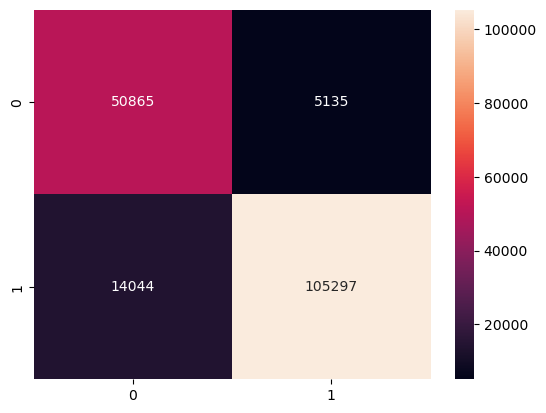

In [44]:
f = sns.heatmap(cm, annot=True, fmt='d')

In [45]:
cm=confusion_matrix(y_test,y_pred,normalize='true')

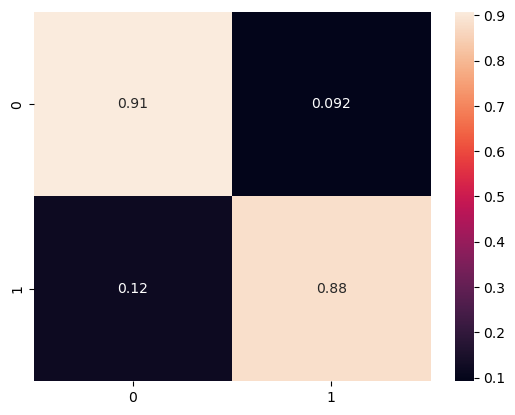

In [46]:
f = sns.heatmap(cm, annot=True, fmt='.2g')

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     56000
           1       0.95      0.88      0.92    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.90      0.88    175341
weighted avg       0.90      0.89      0.89    175341



In [48]:
pip install prettytable

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Model","Accuracy"]
x.add_row([" Logistic Regression ", 0.77])  
x.add_row([" KNN (Best k = 16)", 0.71]) 
x.add_row([" LDA", 0.87]) 
x.add_row([" QDA", 0.81]) 
x.add_row([" ANN", 0.89]) 
print(x)

+-----------------------+----------+
|         Model         | Accuracy |
+-----------------------+----------+
|  Logistic Regression  |   0.77   |
|    KNN (Best k = 16)  |   0.71   |
|           LDA         |   0.87   |
|           QDA         |   0.81   |
|           ANN         |   0.89   |
+-----------------------+----------+
